
----------------------- Start of Task 1 ---------------------------
Algorithm 1
Data: 5.0, 36569.0, 0
Result: 36570.0, 0

Algorithm 2
Data: 36569.59715363488
Result: 36570.0, 0

Algorithm 3
Data: (36570.0, 0), (24594.0, 0)
Result: 61164.0, 0

------------------------ End of Task 1 ----------------------------


----------------------- Start of Task 2 ---------------------------

Algorithm performed 1000 times

Overall error for x1, len = 1000
Min_error = 1.4138614364633871e-08, Max_error = 4.645103415374977e-05, Mean_error = 6.642684264895961e-06

Overall error for x2, len = 1000
Min_error = 2.484830643474556e-08, Max_error = 4.276057271695148e-05, Mean_error = 5.990883337523689e-06

Overall error for x1 + x2, len = 1000
Min_error = 0.0, Max_error = 4.787208578677773e-05, Mean_error = 6.0642054917776635e-06

------------------------ End of Task 2 ----------------------------



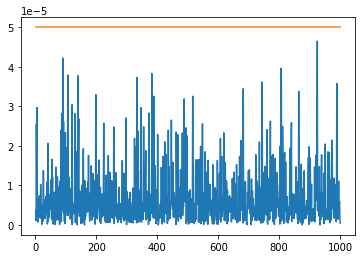

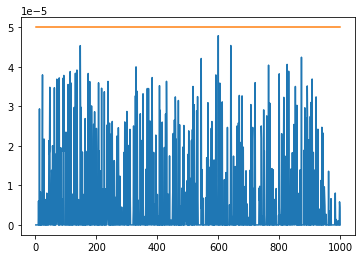

In [15]:
import numpy as np
from numpy import sign
from numpy import mean
from random import uniform

t = 5

overall_list = []
overall_m = []
overall_e = []
overall_x1_plus_x2 = []
overall_error_x1 = []
overall_error_x2 = []
overall_error_x1_plus_x2 = []

def generate_random():
    num_i = uniform(-99999,99999)   #Have to change this to (-99999,99999) in task 1, then change it to for the rest of the task(-999,999)
    return num_i

#generate_random()

def round_to_nearest(x1):      #x1 format: [remainder, m, e]， 3個input，function input只能是dict（已解決）

    if x1[0] >= 5:             #If remainder is greater than 5
        x1[1] += 1             # m = m + 1
        if x1[1] >= 10 ** 5:       #If m >= 100,000. Omit the scenario where m = 99999
            x1[1] = x1[1] // 10
            x1[2] += 1

    df_m.append(x1[1]) #保存四捨五入後的x1
    df_e.append(x1[2]) #保存四捨五入後的e

    #print(f"四捨五入後的x1{df_m}")
    #print(f"四捨五入後的e{df_e}")
    '''
    else:
        df_m.append(x1[1])  #保存四捨五入後的x1
        df_e.append(x1[2])  #保存四捨五入後的e
    '''

    after_round_m = x1[1]
    after_round_e = x1[2]

    return [after_round_m, after_round_e]     #return 這function需註明generate()[0] or generate()[1]

def translate(x):      #Data = x
    s = sign(x)     #Obtain sign of x. If +: s = 1. If -: s = -1
    a = abs(x)      #Compute absolute value of x
    e = 0           #Initialize value of e
    if a > 10 ** t:     #If a has more than 6 digits, then proceed to if condition
        m = a // 1      #Integer dividing a with 1 to get integer value of a
        while m >= 10 ** t:     #While loop until a is less than 5 digit
            remain = m % 10     #Using m mod 10 to obtain remainder
            m = m // 10         #Integer divide m by 10 to get rid of the remainder
            e += 1              #Add 1 to e everytime to keep record of how many remainder we removed
            x1 = [remain, m, e] #命名dict x1，將這個dict丟進round_to_nearest函數去運算
            pre_round_x1 = [remain, m, e] #未經過四捨五入處理的x1

        #round_to_nearest(x1)
        xx1 = round_to_nearest(x1)
        #after_round_m = round_to_nearest(x1)[0]
        #after_round_e = round_to_nearest(x1)[1]
        after_round_m = xx1[0]
        after_round_e = xx1[1]

        xx1[0] = s * xx1[0]
        tuple_output = [x1[0],xx1[0],xx1[1]]      #tuple_output: 經過四捨五入處理的x1，格式(remain, m, e)
        return [tuple_output, pre_round_x1, after_round_m, after_round_e]       #pre_round包含了[remain, m, e]

    else:
        while a < 10 ** (t-1):  # a = 123.123, enter while loop| a = 1231.23, enter while loop a is less than 10000
            a = 10 * a          # a = 10 * 123.123 = 1231.23| a = 12312.3. multiply a with 10 to move decimal place back 1 step
            e -= 1              # e = -1|   e = -2

        int_div_a = a // 1
        remain = (10 * (a - int_div_a)) // 1  #Error: // will cause output as .2999 instead of .3, which cause remain = 2 instead of 3. Python inexact representation, include to report
        m = a // 1
        x1 = [remain, m, e]
        pre_round_x1 = [remain, m, e]

        # round_to_nearest(x1)
        xx1 = round_to_nearest(x1)
        # after_round_m = round_to_nearest(x1)[0]
        # after_round_e = round_to_nearest(x1)[1]
        after_round_m = xx1[0]
        after_round_e = xx1[1]

        xx1[0] = s * xx1[0]
        tuple_output = [x1[0], xx1[0], xx1[1]]
    return [tuple_output, pre_round_x1, after_round_m, after_round_e]     #使用tuple_output: 後面所有translate(i)[0]改為後面所有translate(i)[0][?], 使用pre_round_x1, translate(i)[1][?],after_round_m = translate(i)[2], after_round_e = translate(i)[3]


def addition():   #mx = df_m[0], ex = df_e[0], my = df_m[1], ey = df_e[1]
    m_x = df_x1_m_2[0]
    e_x = df_x1_e_2[0]
    m_y = df_x2_m_2[0]
    e_y = df_x2_e_2[0]
    shift = e_x - e_y

    if shift > 0:
        a = m_x * 10 ** shift
        b = m_y
        e = e_y

    else:
        a = m_y * 10 ** (-1 * shift)
        b = m_x
        e = e_x

    c = a + b
    s = sign(c)
    c = abs(c)

    if c >= 10 ** t:
        while c >= 10 ** t:
            remain = c % 10
            c = c // 10
            e += 1
        x1 = [remain, c, e]
    else:
        while c < 10 ** (t-1):
            c = c * 10
            e -= 1
        x1 = [0, c, e]

    xxxx1 = round_to_nearest(x1)
    #round_to_nearest(x1)
    xxxx1[0] = s * xxxx1[0]
    tuple_output = [xxxx1[0], xxxx1[1]]  #Tuple ()

    return tuple_output

#在進入for loop前先跑一次routine 1, 2, 3得到需求output
random_x1_full = []
random_x2_full = []

df_x1_m_2_full = []
df_x1_e_2_full = []
df_x1_pre_round_remain_full = []
df_x1_pre_round_m_full = []
df_x1_pre_round_e_full = []
df_x1_after_round_m_full = []
df_x1_after_round_e_full = []

df_x2_m_2_full = []
df_x2_e_2_full = []

x1_plus_x2_full = []
x1_plus_x2_e_full = []

error_x1_x2_full = []

for i in range(1):
    random_x1 = []
    random_x2 = []

    df_m = []
    df_e = []

    df_x1_m_2 = []
    df_x1_e_2 = []
    df_x1_pre_round_remain = []
    df_x1_pre_round_m = []        #pre round結果會在translate進入rounding前找到
    df_x1_pre_round_e = []      #pre round結果會在translate進入rounding前找到
    df_x1_after_round_m = []  # pre round結果會在translate進入rounding前找到
    df_x1_after_round_e = []


    df_x2_m_2 = []
    df_x2_e_2 = []
    df_x2_pre_round = []
    df_x2_pre_round_e = []

    x1_plus_x2 = []
    x1_plus_x2_e = []

    ini_x1 = generate_random()
    ini_x2 = generate_random()

    random_x1.append(ini_x1)
    random_x2.append(ini_x2)
    random_x1_full.append(ini_x1)
    random_x2_full.append(ini_x2)

    for i in random_x1:
        xxx1 = translate(i)
        df_x1_m_2.append(xxx1[0][1])
        df_x1_e_2.append(xxx1[0][2])
        df_x1_m_2_full.append(xxx1[0][1])               #After sign change
        df_x1_e_2_full.append(xxx1[0][2])
        df_x1_pre_round_remain.append(xxx1[1][0])
        df_x1_pre_round_remain_full.append(xxx1[1][0])
        df_x1_pre_round_m.append(xxx1[1][1])
        df_x1_pre_round_m_full.append(xxx1[1][1])       #return [tuple_output, pre_round_x1, after_round_m, after_round_e]#pre_round包含了[remain, m, e]
        df_x1_pre_round_e.append(xxx1[1][2])            #使用tuple_output: 後面所有translate(i)[0]改為後面所有translate(i)[0][?], 使用pre_round_x1, translate(i)[1][?],after_round_m = translate(i)[2], after_round_e = translate(i)[3]
        df_x1_pre_round_e_full.append(xxx1[1][2])
        df_x1_after_round_m.append(xxx1[2])
        df_x1_after_round_m_full.append(xxx1[2])        #Before sign change
        df_x1_after_round_e.append(xxx1[3])
        df_x1_after_round_e_full.append(xxx1[3])


    for i in random_x2:
        xxx2 = translate(i)
        df_x2_m_2.append(xxx2[0][1])
        df_x2_e_2.append(xxx2[0][2])
        df_x2_m_2_full.append(xxx2[0][1])
        df_x2_e_2_full.append(xxx2[0][2])


    yyy1 = addition()
    x1_plus_x2.append(yyy1[
                          0])  # Append c, 需要計算 routine 3 relative error, 需要思考如何使用addition function裡的rou_3_result：前面的function能夠使用x1的原因是因為在for loop裡將function return的值加進df
    x1_plus_x2_e.append(yyy1[1])  # Append e
    x1_plus_x2_full.append(yyy1[0])
    x1_plus_x2_e_full.append(yyy1[1])

print("")
print("----------------------- Start of Task 1 ---------------------------")#轉換前， 轉換後
print("Algorithm 1")
print(f"Data: {df_x1_pre_round_remain_full[0]}, {df_x1_pre_round_m_full[0]}, {df_x1_pre_round_e_full[0]}")
print(f"Result: {df_x1_after_round_m_full[0]}, {df_x1_after_round_e_full[0]}")
print("")
print("Algorithm 2")
print(f"Data: {random_x1_full[0]}")
print(f"Result: {df_x1_m_2_full[0]}, {df_x1_e_2_full[0]}")
print("")
print("Algorithm 3")
print(f"Data: ({df_x1_m_2_full[0]}, {df_x1_e_2_full[0]}), ({df_x2_m_2_full[0]}, {df_x2_e_2_full[0]})")
print(f"Result: {x1_plus_x2_full[0]}, {x1_plus_x2_e_full[0]}")
print("")
print("------------------------ End of Task 1 ----------------------------")
print("")

#Random number ready, x1 x2 ready, proceed to routine 2

random_x1_full = []     #Initialize all array
random_x2_full = []

df_x1_m_2_full = []
df_x1_e_2_full = []
df_x1_pre_round_remain_full = []
df_x1_pre_round_m_full = []
df_x1_pre_round_e_full = []
df_x1_after_round_m_full = []
df_x1_after_round_e_full = []

df_x2_m_2_full = []
df_x2_e_2_full = []

x1_plus_x2_full = []
x1_plus_x2_e_full = []

error_x1_full = []
error_x2_full = []
error_x1_x2_full = []

count = 0
count_x_for_graph = []
u_list_for_graph = []
u_n = (10 ** (1-t)) / 2

for i in range(1000):      #Part 2

    count += 1
    count_x_for_graph.append(count)
    u_list_for_graph.append(u_n)

    random_x1 = []
    random_x2 = []

    df_m = []
    df_e = []

    df_x1_m_2 = []
    df_x1_e_2 = []
    df_x1_pre_round_remain = []
    df_x1_pre_round_m = []        #pre round結果會在translate進入rounding前找到
    df_x1_pre_round_e = []      #pre round結果會在translate進入rounding前找到
    df_x1_after_round_m = []  # pre round結果會在translate進入rounding前找到
    df_x1_after_round_e = []


    df_x2_m_2 = []
    df_x2_e_2 = []
    df_x2_pre_round = []
    df_x2_pre_round_e = []

    x1_plus_x2 = []
    x1_plus_x2_e = []

    ini_x1 = generate_random()
    ini_x2 = generate_random()

    random_x1.append(ini_x1)
    random_x2.append(ini_x2)
    random_x1_full.append(ini_x1)
    random_x2_full.append(ini_x2)

    for i in random_x1:
        xxx1 = translate(i)
        df_x1_m_2.append(xxx1[0][1])
        df_x1_e_2.append(xxx1[0][2])
        df_x1_m_2_full.append(xxx1[0][1])               #After sign change
        df_x1_e_2_full.append(xxx1[0][2])
        df_x1_pre_round_remain.append(xxx1[1][0])
        df_x1_pre_round_remain_full.append(xxx1[1][0])
        df_x1_pre_round_m.append(xxx1[1][1])
        df_x1_pre_round_m_full.append(xxx1[1][1])       #return [tuple_output, pre_round_x1, after_round_m, after_round_e]#pre_round包含了[remain, m, e]
        df_x1_pre_round_e.append(xxx1[1][2])            #使用tuple_output: 後面所有translate(i)[0]改為後面所有translate(i)[0][?], 使用pre_round_x1, translate(i)[1][?],after_round_m = translate(i)[2], after_round_e = translate(i)[3]
        df_x1_pre_round_e_full.append(xxx1[1][2])
        df_x1_after_round_m.append(xxx1[2])
        df_x1_after_round_m_full.append(xxx1[2])        #Before sign change
        df_x1_after_round_e.append(xxx1[3])
        df_x1_after_round_e_full.append(xxx1[3])


    for i in random_x2:
        xxx2 = translate(i)
        df_x2_m_2.append(xxx2[0][1])
        df_x2_e_2.append(xxx2[0][2])
        df_x2_m_2_full.append(xxx2[0][1])
        df_x2_e_2_full.append(xxx2[0][2])


    yyy1 = addition()
    x1_plus_x2.append(yyy1[0])  # Append c, 需要計算 routine 3 relative error, 需要思考如何使用addition function裡的rou_3_result：前面的function能夠使用x1的原因是因為在for loop裡將function return的值加進df
    x1_plus_x2_e.append(yyy1[1])  # Append e
    x1_plus_x2_full.append(yyy1[0])
    x1_plus_x2_e_full.append(yyy1[1])

    # Error運算
    
    #x1 error computation
    x1_m = df_x1_m_2[0]
    x1_e = df_x1_e_2[0]

    x1_m_10_e = x1_m * (10 ** x1_e)

    error_x1 = abs((x1_m_10_e - ini_x1)/ini_x1)
    error_x1_full.append(error_x1)
    
    
    #x2 error computation
    x2_m = df_x2_m_2[0]
    x2_e = df_x2_e_2[0]
    x2_m_10_e = x2_m * (10 ** x2_e)
    error_x2 = abs((x2_m_10_e - ini_x2)/ini_x2)
    error_x2_full.append(error_x2)

    # x + y error computation
    exact_x1_x2 = x1_m_10_e + x2_m_10_e
    x1_x2_10_e = yyy1[0] * (10 ** yyy1[1])
    error_x1_x2 = abs((exact_x1_x2 - x1_x2_10_e) / exact_x1_x2)
    error_x1_x2_full.append(error_x1_x2)

print("")
print("----------------------- Start of Task 2 ---------------------------")#轉換前， 轉換後
print("")
print(f"Algorithm performed {count} times")
print("")

print(f"Overall error for x1, len = {len(error_x1_full)}")
print(f"Min_error = {min(error_x1_full)}, Max_error = {max(error_x1_full)}, Mean_error = {mean(error_x1_full)}")
print("")
print(f"Overall error for x2, len = {len(error_x2_full)}")
print(f"Min_error = {min(error_x2_full)}, Max_error = {max(error_x2_full)}, Mean_error = {mean(error_x2_full)}")
print("")
print(f"Overall error for x1 + x2, len = {len(error_x1_x2_full)}")
print(f"Min_error = {min(error_x1_x2_full)}, Max_error = {max(error_x1_x2_full)}, Mean_error = {mean(error_x1_x2_full)}")
print("")
print("------------------------ End of Task 2 ----------------------------")
print("")


#轉到Jupyter notebook畫圖
#建立新的代碼文件進行accumulation

import matplotlib.pyplot as plt

y1 = np.array(error_x1_full) #Need to plot error of all x's
x1 = np.array(count_x_for_graph)
y2 = np.array(u_list_for_graph)
x2 = x1

plt.plot(x1, y1, x2, y2)
plt.show()


yy1 = np.array(error_x1_x2_full)
xx1 = np.array(count_x_for_graph)
yy2 = np.array(u_list_for_graph)
xx2 = xx1

plt.plot(xx1, yy1, xx2, yy2)
plt.show()

#Part 4思路
#n 個Floating pt number, 從n1 + ... + nn

#找Condition number
#Lord please help



In [3]:
x_n_list = []
x_e_list = []

for i in range(100):
  x_i = df_x1_m_2_full[i]
  x_i_e = df_x1_e_2_full[i]
  x_n_list.append(x_i)
  x_e_list.append(x_i_e)

print(x_n_list)
print(x_e_list)
print(range(len(x_n_list)))

[-57665.0, 91865.0, 64612.0, -98312.0, 83450.0, -64661.0, -54764.0, 65682.0, -98162.0, 54458.0, -48029.0, -62035.0, -91722.0, 54515.0, 26114.0, 83877.0, -82095.0, -11841.0, -41205.0, 81365.0, 69571.0, 89134.0, 85720.0, 88807.0, 50189.0, -80541.0, -58862.0, 53350.0, 97987.0, -94866.0, -63065.0, 49224.0, -83900.0, 40005.0, 47764.0, 82563.0, -66376.0, -71835.0, 97938.0, 63361.0, 45276.0, 76998.0, 12873.0, 68369.0, 66169.0, 42172.0, 38343.0, 63231.0, 42285.0, 59109.0, -53373.0, 12246.0, -19401.0, -72116.0, -52820.0, 56107.0, -67355.0, -85354.0, 88473.0, 15536.0, -61246.0, 41060.0, -35965.0, -87231.0, -83390.0, 94891.0, 71109.0, 18966.0, -40180.0, -85851.0, 37643.0, 59899.0, -43779.0, -20350.0, -64914.0, 37104.0, 30799.0, 25223.0, 74633.0, 82021.0, 95593.0, -55008.0, -81926.0, -66615.0, -26588.0, 41398.0, -50213.0, 25970.0, -55813.0, 24485.0, 97045.0, 20416.0, -50651.0, 16166.0, 82651.0, -48545.0, -32234.0, 47900.0, -98111.0, -30521.0]
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -2

In [4]:
s_n_list = []
s_n_e_list = []

x_ini = x_n_list[0]
e_ini = x_e_list[0]

def accumulation(acc):
  shift = e_x - e_y   #先得到第一個shift
  if shift > 0:     #Routine 3的操作
    a = m_x * (10 ** shift)
    b = m_y
    e = e_y
  else:
    a = m_y * (10 ** (-1 * shift))
    b = m_x
    e = e_x

  c = a + b
  s = sign(c)
  c = abs(c)

  if c >= 10 ** t:
    while c >= 10 ** t:
      remain = c % 10
      c = c // 10
      e += 1
    x1 = [remain, c, e]
  else:
    while c < 10 ** (t-1):
      c = c * 10
      e -= 1
    x1 = [0, c, e]
      
  acc1 = round_to_nearest(x1)
  acc1[0] = s * acc1[0]
  s_n_list.insert(0, acc1[0])
  s_n_e_list.insert(0, acc1[1])

  return acc1[0], acc1[1]


for i in range(len(x_n_list)):

  if i < len(x_n_list) - 1:

    acc_x1 = x_ini
    acc_x1_e = e_ini
    acc_x_n = x_n_list[i+1]
    acc_x_n_e = x_e_list[i+1]

    if i == 0:
      m_x = acc_x1
      e_x = acc_x1_e

      m_y = acc_x_n
      e_y = acc_x_n_e

      acc = [m_x, e_x, m_y, e_y]

      accumulation(acc)
    else:
      m_x = s_n_list[0]
      e_x = s_n_e_list[0]

      m_y = x_n_list[i+1]
      e_y = x_e_list[i+1]

      acc = [m_x, e_x, m_y, e_y]
      accumulation(acc)
                            #得到第一次運算結果， 需要使用這個結果來進行下次的運算，要思考的是如何讓x1+x2的結果持續改變
                            #這次的運算結果output是-30324， 0. 這個會變成我們的x1，然後回到x_n_list裡面提取x3並且再次進行addition算法
    
s_hat = s_n_list[0] * (10 ** s_n_e_list[0])                            #第n次運算
print(f"s_hat = {s_hat}")

test_set = []
for i in range(len(x_n_list)):
  if i < len(x_n_list) - 1:
    if i == 0:
      mmm1 = x_n_list[i]
      eee1 = x_e_list[i]
      mmm2 = x_n_list[i+1]
      eee2 = x_e_list[i+1]
      me1 = mmm1 * (10 ** eee1)
      me2 = mmm2 * (10 ** eee2)
      me12 = me1 + me2
      test_set.insert(0, me12)    
    else:
      mmm1 = test_set[0]
      mmm2 = x_n_list[i+1]
      eee2 = x_e_list[i+1]
      me2 = mmm2 * (10 ** eee2)
      me12 = mmm1 + me2
      test_set.insert(0, me12)

s_n = test_set[0]
print(f"s_n = {s_n}")


s_hat = 5067.700000000001
s_n = 5067.1730000000025


In [5]:
#Bound verify
#Absolute value of (s_hat - s_n)

lhs = abs(s_hat - s_n)
print(lhs)

0.5269999999982247


In [8]:
n = len(x_n_list)

norm_set = []         #||ξ_1:100||, fl.pt. array裡面的vector
for i in range(len(x_n_list)):  
  if i < len(x_n_list) - 1:
    if i == 0:
      mmm1 = x_n_list[i]
      eee1 = x_e_list[i]
      mmm2 = x_n_list[i+1]
      eee2 = x_e_list[i+1]
      me1 = mmm1 * (10 ** eee1)
      me2 = mmm2 * (10 ** eee2)
      me12 = abs(me1) + abs(me2)
      norm_set.insert(0, me12)    
    else:
      mmm1 = norm_set[0]
      mmm2 = x_n_list[i+1]
      eee2 = x_e_list[i+1]
      me2 = mmm2 * (10 ** eee2)
      me12 = abs(mmm1) + abs(me2)
      norm_set.insert(0, me12)

#print(n)
#print(norm_set)

In [9]:
bound = (n-1) * norm_set[0] * u_n
print(f"|s_hat - s_n| = {lhs}")   #abs(s_hat - sn)Actual Error計算
print(f"(n-1)*||ξ1:n||*u_n = {bound}")

|s_hat - s_n| = 0.5269999999982247
(n-1)*||ξ1:n||*u_n = 272.60915715000004


In [10]:
#Bound for p = abs(x_i * u)
#x_i data: random_x1_full, Initial generated number

x_i_list = []

for i in range(100):
  x_i = random_x1_full[i]
  x_i_list.append(x_i)

   #First 100 random_x1_full
print(len(x_i_list))

100


In [11]:
#Generate p
def generate_100_p():
  p_list = []
  for i in x_i_list:
    up_bound = abs(i * u_n)
    low_bound = -1 * abs(i * u_n)
    p = uniform(low_bound, up_bound)
    p_list.append(p)
  return p_list
#print(generate_100_p())

In [12]:
#Created new list for completed fl.pt. number.
xi_i_list = []    #ξ_1, ξ_2, ... ,ξ_n
for i in range(len(x_n_list)):
  if i < len(x_n_list) - 1:
    m = x_n_list[i]
    e = x_e_list[i]
    xi = m * (10 ** e)
    xi_i_list.append(xi)

print(f"x_1, x_2, ... , x_100 = {x_i_list}")
print(f"ξ_1, ξ_2, ... ,ξ_100 = {xi_i_list}")

x_1, x_2, ... , x_100 = [-576.6491735268729, 918.6452849383986, 646.1196481043733, -983.1185584043699, 834.5049953757534, -646.6139278600667, -547.6372892041975, 656.8242210772055, -981.6207386009468, 544.5844889976879, -480.2941037168596, -620.3510974800233, -91.72209240285645, 545.1471893827384, 261.1448382912604, 838.7712159199541, -820.94667250768, -118.40890423322764, -412.0514724536389, 813.6453033439643, 695.70767875253, 89.13441517537763, 857.2037342986978, 888.0748407135118, 501.88728954359567, -805.4133106910913, -588.6203530961535, 533.5000300654344, 979.8733723673029, -948.6612296278962, -630.64793041252, 492.23722701870406, -838.9951486496792, 400.049367179701, 477.64110878355314, 825.6303354674881, -663.7622799407136, -718.3454301158579, 979.3842116528458, 633.6104831969053, 452.7578718348682, 769.9826157303039, 12.87332934670485, 683.6887957201757, 661.6863774115029, 421.71864951041607, 383.4300104533879, 632.3147873185976, 422.847026544202, 59.10900069108857, -533.72698

In [13]:
#Need for loop to generate 1000 set of p
#Each iteration calculate K_rel
#Append each iteration result
#Obtain max of K_rel list

def k_rel(k_rel_i):    #Need Sum of x_i, Sum of s_n, x_i_list,
  sum_xi = k_rel_i[0]
  sum_xi_pi = k_rel_i[1]
  x_norm = k_rel_i[2]
  p_norm = k_rel_i[3]
  result_i = (abs(sum_xi - sum_xi_pi) / abs(sum_xi)) * (x_norm / p_norm)
  return result_i

sum_x_100 = sum(x_i_list) #Ok
abs_x_i_list = []

for i in x_i_list:
  abs_x_i = abs(i)  #Abs each value in x_i
  abs_x_i_list.append(abs_x_i)

x_i_norm_100 = sum(abs_x_i_list)

count = 0
true_c_rel = []
for i in range(1000):
  
  count += 1
  
  p_list = generate_100_p() #Generate p for i run
  sum_xi_pi = []
  abs_p_list = []
  for i in range(len(x_i_list)):
    c_rel = []
    if i < len(x_i_list):
      if i == 0:
        x_i_i = x_i_list[0]
        p_i_i = p_list[0]
        xi_pi = x_i_i + p_i_i
        p_norm = abs(p_list[0])
        abs_p_list.insert(0, p_norm)
        sum_xi_pi.insert(0, xi_pi)
      else:
        last_result = sum_xi_pi[0]
        x_i_i = x_i_list[i]
        p_i_i = p_list[i]
        xi_pi = x_i_i + p_i_i
        next_result = last_result + xi_pi
        p_norm = abs(p_list[i])
        abs_p_list.insert(0, p_norm)
        sum_xi_pi.insert(0, next_result)
    
    sum_xi_pi_100 = sum_xi_pi[0]
    p_norm_100 = sum(abs_p_list)
    k_rel_i = [sum_x_100, sum_xi_pi_100, x_i_norm_100, p_norm_100]
    run = k_rel(k_rel_i)
    c_rel.insert(0, run)
  true_k = c_rel[0]
  true_c_rel.append(true_k)

print(f"Algorithm performed {count} times")
print("---------------------------------------------")
print(f"delta_x ={sum_x_100 - sum_xi_pi_100}")
print(f"x = {sum_x_100}")
print(f"delta_d = {p_norm_100}")
print(f"d = {x_i_norm_100}")
print("---------------------------------------------")
print(f"Length of C_rel array:{len(true_c_rel)}")
print(f"Max value of C_rel array:{max(true_c_rel)}")

Algorithm performed 1000 times
---------------------------------------------
delta_x =0.0932130370347295
x = 5067.183357061316
delta_d = 1.3910485909567751
d = 55072.55929840072
---------------------------------------------
Length of C_rel array:1000
Max value of C_rel array:4.475774456214143


In [14]:
come = abs((sum_x_100 - s_n) / sum_x_100)
on = abs(max(true_c_rel) * ( p_norm_100 / x_i_norm_100))
print(f"Relative error of x_i and ξ_i = {come} ")
print(f"Consistent? {on}")

Relative error of x_i and ξ_i = 2.043948399709101e-06 
Consistent? 0.00011305121516184578
